# MA934 Numerical Methods - Workbook 3

If you haven't already done so, install the DualNumbers Julia package. It is a good idea to update all your packages first. The commands are

>Pkg.update()

>Pkg.add("DualNumbers")

but you only need to run them once. 

## Question 1: Numerical differentiation

**1)** Derive a finite difference formula for the derivative of a function $f$ at a point $x$ using the 3-point stencil $(x, x+h, x+2h)$ and state the order of the approximation error in terms of $h$.

**2)** Write a formula for the derivative, $f^\prime(x)$, of the function

$$f(x) = \sin(\exp(x)) $$

and evaluate it at $x=1$.

**3)** Use your finite difference formula to approximate the value of $f^\prime(1)$ for values of $h$ decreasing from $2^{-1}$ to $2^{-30}$ in powers of $2$. Plot the error as a function of $h$ and verify the theoretically predicted scaling of the error with $h$. What is the best relative error you can achieve?

**4)** Read the examples at https://github.com/JuliaDiff/DualNumbers.jl. Define a dual number $x = 1+\epsilon$ and use it to evaluate $f^\prime(1)$. Verify that the answer is accurate to within machine precision.

**Answer to 1)** 

Similar to the lecture notes and defining $f(x_{i+k})=f(x_{i}+kh)$, we use Taylor's theorem:

\begin{align*}
    f(x_{i+1})=f(x_{i}+h) &= f(x_{i}) + hf'(x_{i})+\frac{h^{2}}{2}f''(x_{i}) + O(h^{3}) \\
    f(x_{i+2})=f(x_{i}+2h) &= f(x_{i}) + 2hf'(x_{i})+\frac{4h^{2}}{2}f''(x_{i})+O(h^{3})
\end{align*}

The linear combination is then given by:

\begin{align*}
    a_{1}f(x_{i})+a_{2}f(x_{i+1})+a_{3}f(x_{i+2}) = (a_{1}+a_{2}+a_{3})f(x_{i}) + (a_{2}+2a_{3})hf'(x_{i})+(a_{2}+4a_{3})\frac{h^{2}}{2}f''(x_{i})+O(h^{3})
\end{align*}

We solve for $f'(x_{i})$, so the system is:

\begin{align*}
    a_{1}+a_{2}+a_{3} &= 0 \\
    a_{2}+2a_{3} &= 1 \\
    a_{2}+4a_{3} &= 0
\end{align*}

The solution is $a_{1}=-\frac{3}{2}, a_{2}=2, a_{3}=-\frac{1}{2}$. Hence we obtain

\begin{align*}
    -\frac{3}{2}f(x_{i})+2f(x_{i+1})-\frac{1}{2}f(x_{i+2}) = hf'(x_{i})+O(h^{3}) 
    \Rightarrow f'(x_{i}) = \frac{4f(x_{i+1})-3f(x_{i})-f(x_{i+2})}{2h}+O(h^{2})
\end{align*}

**Answer to 2)** 

The derivative is $f'(x) = e^{x} \cos{e^{x}}$ and using Julia's analytics, we get: $f'(1) \approx -2.478349732$.

In [1]:
answer2 = e*cos(e)

-2.478349732955235

**Answer to 3)** 


In [2]:
#Pkg.update()
#Pkg.add("DualNumbers")
using PyPlot
using DualNumbers;

In [3]:
#defining the functions. 
#f_theoretical is the theoretical first derivative of f(x)
#f_approx is the approximated first derivative of f(x)

f(x) = sin(exp(x))
f_theoretical(x) = cos(exp(x)) * exp(x)
f_approx(x,h) = 0.5*(-3*f(x)+4*f(x+h)-f(x+2h))./ h;

In [4]:
h = 2.0.^(-collect(1:30))
abs_error = abs(f_theoretical(1.0) - f_approx(1.0,h))
rel_error = (f_approx(1.0,h) - f_theoretical(1.0))/f_theoretical(1.0)
theo_pred_scaling = h.^2.0;

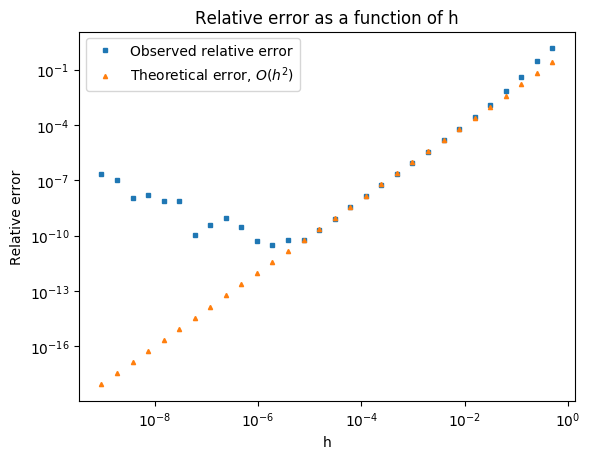

Best relative error: 3.2358031082852225e-11


PyObject <matplotlib.legend.Legend object at 0x7f10801788d0>

In [5]:
M = 2.0.^(-collect(1:30))

theoretical = f_theoretical(1.0)
approx = zeros(length(M));

for i in 1:length(M)
    approx[i] = f_approx(1.0,M[i])
end

loglog(M, abs((approx-theoretical)./theoretical), label="Observed relative error", "s", markersize=3)
loglog(M,M.^2, label="Theoretical error, "L"O(h^{2})", "^", markersize=3)
title("Relative error as a function of h")
xlabel("h")
ylabel("Relative error")
println("Best relative error: ", minimum(abs((approx-theoretical)./theoretical)))
legend()

**Answer to 4)** 

In [6]:
println("Machine precision (Float64), ϵₘ = ", eps())

Machine precision (Float64), ϵₘ = 2.220446049250313e-16


$f(Dual(x))$ gives the derivative when evaluated. The machine precision for Float64 seems to be greater than that.

In [7]:
# Dual128 gives Dual(Float64,Float64)
theoretical = f_theoretical(BigFloat(1.0))
x = Dual128(1.0,1.0)
temp = dualpart(f(x))
println("Error: ", Float64(abs((theoretical-temp)/theoretical)))

Error: 1.4835229507361194e-17


## Question 2: Finding roots

**1)** Referring to the function, $f(x)$, defined above, find the roots of the equation

$$ f(x) = 0$$

in the interval $0<x<2$.

**2)** Implement the bracketing and bisection method to find one of the roots numerically. Measure the error at each iteration of the algorithm and demonstrate that the error decreases exponentially as a function of the number of iterations. To how many digits of precision can you approximate the root?

**3)** Perform the same measurements for the Newton Raphson method and show that the error decreases faster than exponentially as a function of the number of iterations.

## Question 3: Finding minima

**1)** The function $f(x)$ above has a single minimum in the interval $0<x<2$. Find its location analytically.

**2)** Implement the Golden section search to find the location of this minimum numerically. Plot the error as a function of the number of iterations. To how many digits of precision can you approximate the location of the minimum?

**3)** To understand your empirical findings, use Taylor's Theorem to show that near a minimum, $x_*$, of f(x),

$$f(x) \approx f(x_*)\left( 1+ \frac{f^{\prime\prime}(x_*)}{2\,f(x_*)}\,(x-x_*)^2\right). $$
Show that in order for a computer to distinguish between $f(x)$ and $f(x_*)$ we must have

$$ \left| x-x_*\right| > \sqrt{\epsilon_m}\,\sqrt{\left|\frac{2\,f(x_*)}{f^{\prime\prime}(x_*)}\right|}$$

thus limiting the precision with which the location of a minimum can be determined.